In [99]:
import pandas as pd #데이터프레임 라이브러리 import
import matplotlib as mpl #맷플롭립
import matplotlib.pylab as plt #맷플롭립
import seaborn as sns #시본 라이브러리

plt.rc("font", family='Malgun Gothic')#한글 타이틀

#데이터 준비
titanic= sns.load_dataset("titanic")#타이타닉호 데이터를 'titanic'으로 저장

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<AxesSubplot:title={'center':'Survived by Pclass'}, xlabel='pclass', ylabel='count'>

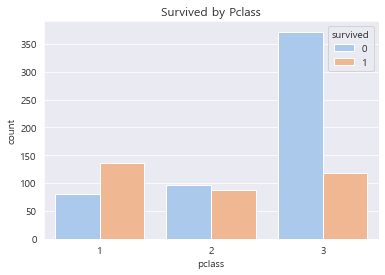

In [103]:
#기본 배경 설정
sns.set_palette("pastel")

plt.title('Survived by Pclass')#차트 제목,타이틀

sns.countplot(x="pclass", hue="survived", data=titanic) 
#countplot 만들기, x값은 pclass사람으로 pclass에 따른 탑승객을 구한다. hue를 통해 집단의 특징을 표현한다.
#이 모든 데이터는 titanic에서 불러온다

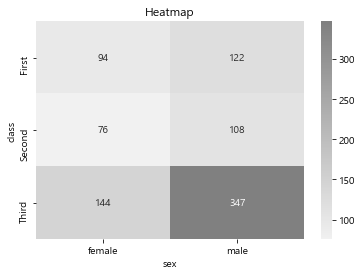

In [33]:
titanic_size= titanic.pivot_table(index="class", columns="sex", aggfunc="size")
#먼저 피봇데이블을 만든다. index는 class이고 columns는 sex이다. 이를 size로 데이터 갯수를 분석한다.
#titanic으로 만든 피봇데이블을 titanic_size로 저장한다.
titanic_size
#저장한 titanic_size의 값으로 heatmap을 그려준다. 
sns.heatmap(titanic_size, cmap=sns.light_palette("gray", as_cmap=True),
           annot=True, fmt="d")
#그래프는 gray색으로 그려주고, 각 셀에 데이터를 사용한다.  
plt.title("Heatmap") #차트 제목,타이틀

plt.show() #차트 보여주기
#as_cmap=True: 시본에서 컬러맵 객체를 사용
#annot=True: 각 셀에 데이터를 써라
#fmt=annotation을 추가할때 사용하는 문자열 포맷 코드

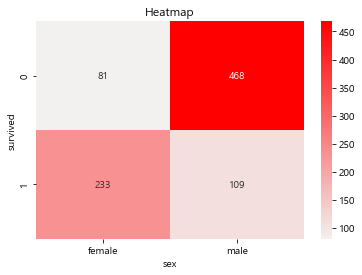

In [38]:
titanic_size= titanic.pivot_table(index="survived", columns="sex", aggfunc="size")
#위와 동일한 방법으로 피봇테이블을 설정한다. 다른 것은 index 값을 survived로 한다.
titanic_size
sns.heatmap(titanic_size, cmap=sns.light_palette("red", as_cmap=True),
           annot=True, fmt="d")
#그래프는 red색으로 그려주고, 각 셀에 데이터를 사용한다.  
plt.title("Heatmap") #차트 제목,타이틀

plt.show() #차트 보여주기
#as_cmap=True: 시본에서 컬러맵 객체를 사용
#annot=True: 각 셀에 데이터를 써라
#fmt=annotation을 추가할때 사용하는 문자열 포맷 코드

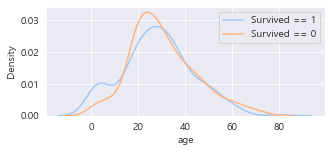

In [101]:
fig, ax= plt.subplots(1, 1, figsize= (5,2))#figsize를 통해 그래프의 크기를 설정했다.
#히스토그램을 각 상황에 맞게 그려준다.
sns.kdeplot(titanic[titanic['survived']==1]['age'], ax=ax)
sns.kdeplot(titanic[titanic['survived']==0]['age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

<AxesSubplot:xlabel='class', ylabel='age'>

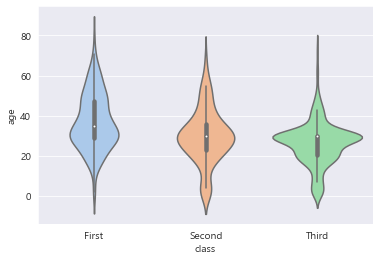

In [102]:
titanic_1=titanic.copy()#타이타닉호 데이터를 복사해서 새로 저장한다.
titanic_1['age']=titanic['age'].fillna(titanic['age'].mean())
#새로 저장한 타이타닉호 데이터에 타이타닉호의 나이 평균값을 나이 그룹의 NaN에 채워준다.
sns.violinplot(x="class", y="age", data=titanic_1)
#age를 채운 새로운 타이타닉호 데이터의 class에 따른 나이 값을 출력한다.

<AxesSubplot:xlabel='embarked', ylabel='count'>

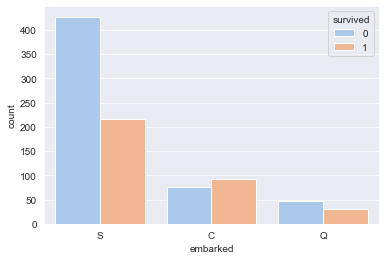

In [98]:
sns.countplot(x="embarked", hue = "survived", data = titanic)
#탑승구역에 따른 인원 수를 survived 특징으로 그래프를 출력한다.

<AxesSubplot:xlabel='embarked', ylabel='count'>

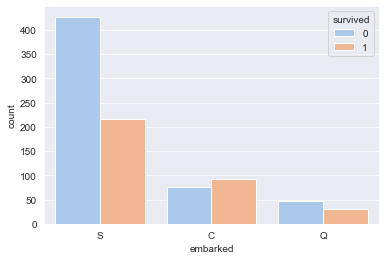